<a href="https://colab.research.google.com/github/Mparate1234/Py_stat_DS_ML/blob/main/assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement 1:

### Write Load the "Country-data.csv" dataset into a DataFrame and perform the following tasks:


In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cntry_data=pd.read_csv('/content/drive/MyDrive/Country-data.csv')
cntry_data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


### 1. Create a seperate DataFrame with only numeric data by remove the "country" column

In [4]:
data=cntry_data.drop('country',axis=1)
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### 2. Scale the data using the Standard Scaler to create a scaled DataFrame


In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'])
scaled_data.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376


### 3. Plotting dendograms with the complete linkage method


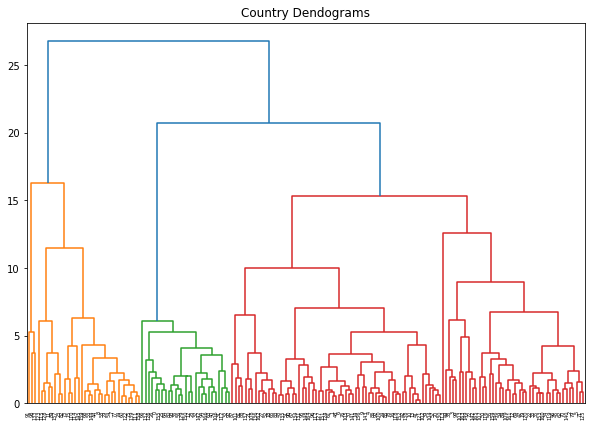

In [6]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Country Dendograms')
dend=shc.dendrogram(shc.linkage(scaled_data,method='ward'))

### 4. Creating cluster labels using cut tree


In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
labels=cluster.fit_predict(scaled_data) 
labels.reshape(-1,1)
scaled_data['Hierarchical_cluster_labels']=labels
scaled_data.head(3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,4
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0


### 5. Perform the 4-Component PCA on DataFrame


In [8]:
from sklearn.decomposition import PCA


In [9]:
pca=PCA(n_components=4)
country_pca=pca.fit_transform(scaled_data)
country_pca.shape

(167, 4)

In [10]:
country_pca=pd.DataFrame(country_pca)
country_pca['Hierarchical_cluster_labels'] = labels
country_pca.head()

,0,1,2,3,Hierarchical_cluster_labels
0,-2.637574,-1.259408,-0.139601,1.203314,2
1,1.191636,-1.432082,-1.070731,-1.017399,4
2,-1.200190,1.887462,0.262693,-1.256854,0
3,-3.534286,0.527040,2.482353,0.233822,0
4,1.773123,-1.302822,-0.316867,-0.714775,4


### 6. Now, from final the DataFrame, analyze how low GDP rate corresponds to the child
mortality rate around the world

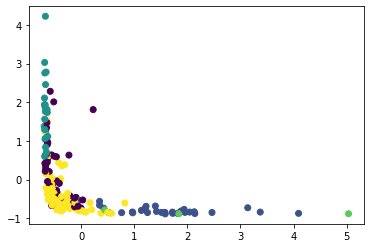

In [11]:
plt.scatter(scaled_data['gdpp'],scaled_data['child_mort'],c=labels)
plt.show()

# Problem Statement 2:
Write a Python program that reads the “Credit Card Customer Data.csv”
(provided on LMS) The following are the tasks that need to be taken into consideration while
constructing the solution to Segregate customers based on the data provided with the help of kmeans clustering.

### 1. Load the Given CSV file into a DataFrame 

In [12]:
import pandas as pd
import numpy as np

In [14]:
cred_data=pd.read_csv('/content/drive/MyDrive/Credit Card Customer Data.csv')
cred_data.head(3)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4


### 2. Find missing values and drop the unnecessary columns


In [15]:
cred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


### 3. Univariate and bivariate analysis


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

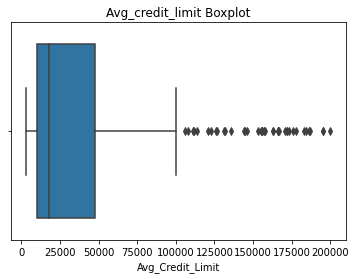

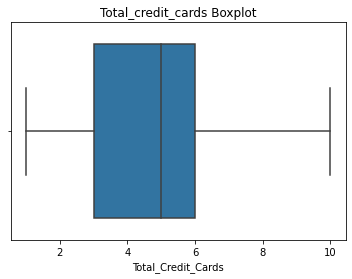

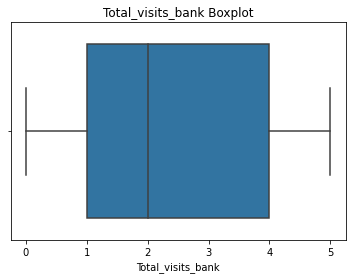

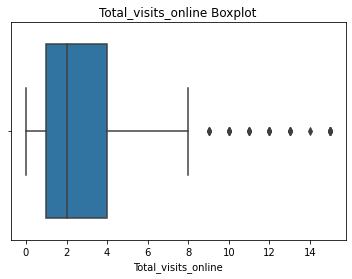

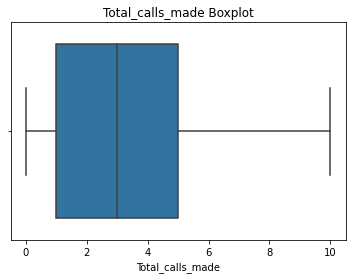

In [17]:
cols = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

for col in cols[:]:
    fig, ax = plt.subplots()
    sns.boxplot(x=cred_data[col], ax=ax)
    ax.set_title(f'{col.capitalize()} Boxplot')
plt.show()



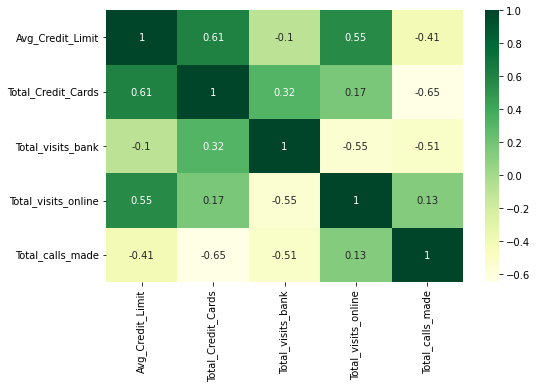

In [18]:
cred_data1 = cred_data[['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']]

plt.figure(figsize=(8,5))
corr_matrix=cred_data1.corr()
sns.heatmap(corr_matrix,annot=True,cmap="YlGn")
plt.show()


In [20]:
cred_data=pd.read_csv('/content/drive/MyDrive/Credit Card Customer Data.csv')
cred_data.head(3)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4


### 4. Standardize the whole dataset

In [21]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
modl=scale.fit(cred_data1)
scaled_d=modl.transform(cred_data1)
scaled_d=pd.DataFrame(scaled_d,columns=['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made'])
scaled_d

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [22]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled_d)
labels=kmeans.predict(scaled_d)
labels
scaled_d['labels']=labels
scaled_d.head(3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0


### 7. Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11), inertia_list)
plt.xticks(np.arange(1,11))
plt.grid(True)
plt.show()

### 8. Observe Cluster behavior with different columns


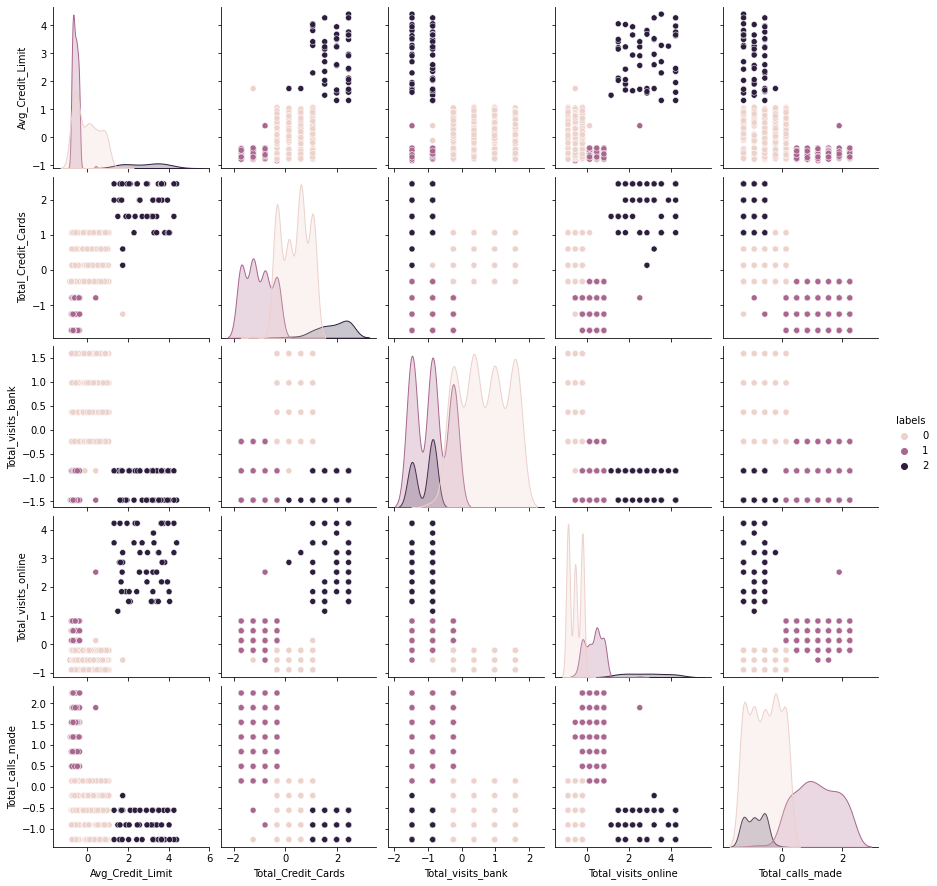

In [26]:
import seaborn as sns

sns.pairplot(scaled_d,hue='labels')
plt.show()

### 9. Print Co-ordinates of all centroids and silhouette scores for the final model


In [27]:
sk_centroids=kmeans.cluster_centers_
sk_centroids

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

# Problem Statement 3: DBSCAN Clustering
Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks:

In [29]:
import pandas as pd

In [30]:
mall_data=pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
mall_data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


### 1. Find the correlation among the all the columns and drop the column/s with the least
correlation

In [31]:
corr_matrix=mall_data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [32]:
df=mall_data[['Age','Annual Income (k$)','Spending Score (1-100)','Gender']]
df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,Male
1,21,15,81,Male
2,20,16,6,Female
3,23,16,77,Female
4,31,17,40,Female
...,...,...,...,...
195,35,120,79,Female
196,45,126,28,Female
197,32,126,74,Male
198,32,137,18,Male


### 2. Encode the "Gender" column using get_dummies() function

In [33]:
df=pd.get_dummies(df,columns=['Gender'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


### 3. Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4


In [34]:
from sklearn.cluster import DBSCAN

In [35]:
db=DBSCAN(eps=12.5,min_samples=4).fit(df)
df['labels']=db.labels_
set(df['labels'])


{-1, 0, 1, 2, 3, 4}

In [36]:
df = df[df['labels'] >= 0]
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,labels
0,19,15,39,0,1,0
1,21,15,81,0,1,0
3,23,16,77,1,0,0
4,31,17,40,1,0,0
5,22,17,76,1,0,0


### 5. Using a scatter plot shows how annual income corresponds to the spending rates of customers

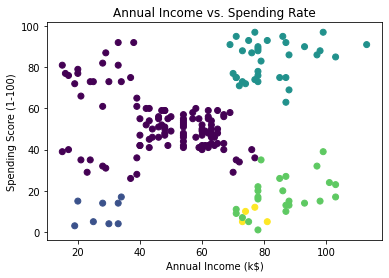

In [37]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],c=df['labels'])

plt.title('Annual Income vs. Spending Rate')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


# Problem Statement 4: 
## Write a Python program that reads the Groceries data.csv (provided on LMS) file into a DataFrame.
## apriori algorithm

### 1. Install mlxtend library for further process


In [ ]:
!pip install mlxtend

### 2. Load the Groceries data.csv data into a Data frame


In [38]:
import pandas as pd

In [39]:
gros_data=pd.read_csv("/content/drive/MyDrive/Groceries data.csv")
gros_data.head(3)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,21-07-2015,tropical fruit,2015,7,21,1
1,2552,01-05-2015,whole milk,2015,5,1,4
2,2300,19-09-2015,pip fruit,2015,9,19,5


### 3. Print customer data where the member number is 1001


In [40]:
member_no_1001=gros_data[gros_data['Member_number']==1001]
member_no_1001

,Member_number,Date,itemDescription,year,month,day,day_of_week
364,1001,20-01-2015,frankfurter,2015,1,20,1
5695,1001,05-02-2015,frankfurter,2015,2,5,3
6612,1001,14-04-2015,beef,2015,4,14,1
9391,1001,02-07-2014,sausage,2014,7,2,2
11046,1001,12-12-2014,whole milk,2014,12,12,4
16513,1001,20-01-2015,soda,2015,1,20,1
21844,1001,05-02-2015,curd,2015,2,5,3
22761,1001,14-04-2015,white bread,2015,4,14,1
25540,1001,02-07-2014,whole milk,2014,7,2,2
27195,1001,12-12-2014,soda,2014,12,12,4


### 4. Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)

In [41]:
item_count=[]
for i in gros_data['Member_number']:
    item_count.append(1)
gros_data['item_count']=item_count
gros_data.head(3)

,Member_number,Date,itemDescription,year,month,day,day_of_week,item_count
0,1808,21-07-2015,tropical fruit,2015,7,21,1,1
1,2552,01-05-2015,whole milk,2015,5,1,4,1
2,2300,19-09-2015,pip fruit,2015,9,19,5,1


### 5. Drop unnecessary columns like "month","day","year","day_of_week"


In [42]:
gd=gros_data.drop(["month","day","year","day_of_week"],axis=1)
gd.head(3)

,Member_number,Date,itemDescription,item_count
0,1808,21-07-2015,tropical fruit,1
1,2552,01-05-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1


### 6. Create a new data frame where all data is grouped by member id and items they bought and set their value as item count.

In [43]:
shopping = (gd.groupby(['Member_number','itemDescription'])['item_count']
         .sum()
         .unstack()
         .fillna(0))
shopping


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
def encode_units(x):
    if x <=0:
        return 0
    if x>=1:
        return 1
item_sets=shopping.applymap(encode_units)
item_sets

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Use the Apriori algorithm and generate frequent itemsets that have the support of atleast 7%
### 8. Generating the rules with their corresponding support, confidence, and lift


In [45]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets=apriori(item_sets,min_support=0.07,use_colnames=True)

rules= association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(bottled beer),0.458184,0.158799,0.085428,0.186450,1.174124,0.012669,1.033988
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
2,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969
3,(other vegetables),(bottled water),0.376603,0.213699,0.093894,0.249319,1.166680,0.013414,1.047450
4,(bottled water),(rolls/buns),0.213699,0.349666,0.079271,0.370948,1.060863,0.004548,1.033832
...,...,...,...,...,...,...,...,...,...
93,"(whole milk, yogurt)",(other vegetables),0.150590,0.376603,0.071832,0.477002,1.266589,0.015119,1.191967
94,"(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507
95,(whole milk),"(other vegetables, yogurt)",0.458184,0.120318,0.071832,0.156775,1.303003,0.016704,1.043235
96,(other vegetables),"(whole milk, yogurt)",0.376603,0.150590,0.071832,0.190736,1.266589,0.015119,1.049608


### 9. Filtering out the values with lift > = 1 and confidence > = 0.5


In [46]:
rules[(rules['lift']>=1)&(rules['confidence']>=0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
9,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
11,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795
19,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766
21,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775
39,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
43,(pastry),(whole milk),0.177527,0.458184,0.091072,0.513006,1.119651,0.009732,1.112572
45,(pip fruit),(whole milk),0.170600,0.458184,0.086968,0.509774,1.112598,0.008801,1.105239
55,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
67,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146
